In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('raw_data.csv')
data.head()

,SUCCESS,DEFAULT,AMOUNT,INTEREST,MONTHS,CREDIT,BIDS,HOUSE,CAR,Year,EDUCATION,WORKTIME,INCOME,IND,CITY,MARRY,ADDRESS,AGE
0,0,0,3000,15.0,3,1,1,1,0,2011,2,1,5,能源业,上海,未婚,上海,27
1,0,0,3000,15.0,6,1,0,0,0,2011,2,1,2,制造业,深圳,未婚,广东,32
2,0,0,3000,20.0,3,1,0,0,0,2011,2,2,4,建筑工程,苏州,未婚,江苏,32
3,0,0,3000,20.4,3,1,0,0,0,2011,1,2,3,IT,邯郸,已婚,河北,29
4,0,0,7000,15.0,6,5,14,0,0,2011,2,1,3,制造业,杭州,已婚,浙江,31


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128573 entries, 0 to 128572
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SUCCESS    128573 non-null  int64  
 1   DEFAULT    128573 non-null  int64  
 2   AMOUNT     128573 non-null  int64  
 3   INTEREST   128573 non-null  float64
 4   MONTHS     128573 non-null  int64  
 5   CREDIT     128573 non-null  int64  
 6   BIDS       128573 non-null  int64  
 7   HOUSE      128573 non-null  int64  
 8   CAR        128573 non-null  int64  
 9   Year       128573 non-null  int64  
 10  EDUCATION  128573 non-null  int64  
 11  WORKTIME   128573 non-null  int64  
 12  INCOME     128573 non-null  int64  
 13  IND        128573 non-null  object 
 14  CITY       128573 non-null  object 
 15  MARRY      128573 non-null  object 
 16  ADDRESS    128573 non-null  object 
 17  AGE        128573 non-null  int64  
dtypes: float64(1), int64(13), object(4)
memory usage: 17.7+ MB


In [7]:
data.drop(data[data['ADDRESS'].map(lambda x : x == '香港' or x == '台湾' or x == '澳门')].index, inplace=True)

In [8]:
data.describe()

,SUCCESS,DEFAULT,AMOUNT,INTEREST,MONTHS,CREDIT,BIDS,HOUSE,CAR,Year,EDUCATION,WORKTIME,INCOME,AGE
count,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000
mean,0.070309,0.005594,58751.692964,16.032722,12.296105,1.190482,3.411119,0.411213,0.235786,2012.740111,1.800073,2.394602,3.904125,32.373821
std,0.255669,0.074583,111021.210662,3.920587,7.951234,0.815687,21.509059,0.492056,0.424490,1.005786,0.793808,1.008723,1.263114,6.763847
min,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,0.000000,5000.000000,15.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,2.000000,3.000000,28.000000
50%,0.000000,0.000000,20000.000000,15.000000,12.000000,1.000000,0.000000,0.000000,0.000000,2013.000000,2.000000,2.000000,4.000000,31.000000
75%,0.000000,0.000000,50000.000000,19.000000,24.000000,1.000000,0.000000,1.000000,0.000000,2014.000000,2.000000,3.000000,4.000000,35.000000
max,1.000000,1.000000,1000000.000000,24.400000,36.000000,7.000000,747.000000,1.000000,1.000000,2014.000000,4.000000,4.000000,7.000000,116.000000


In [9]:
data1 = data.groupby('ADDRESS').agg({'SUCCESS':['count', 'sum'], 'DEFAULT':'sum'})
data1.head(2)

SUCCESS      DEFAULT
          count  sum     sum
ADDRESS                     
上海         4305  286      20
云南         2560  181      14

In [10]:
data1.insert(2, '成功率', data1['SUCCESS']['sum']/data1['SUCCESS']['count'])
data1.insert(4, '违约率', data1['DEFAULT']['sum']/data1['SUCCESS']['sum'])
data1.head(2)

SUCCESS            成功率 DEFAULT       违约率
          count  sum               sum          
ADDRESS                                         
上海         4305  286  0.066434      20  0.069930
云南         2560  181  0.070703      14  0.077348

In [11]:
data2 = data1[['成功率','违约率']]
data2

,成功率,违约率
,,
ADDRESS,,
上海,0.066434,0.069930
云南,0.070703,0.077348
内蒙古,0.034043,0.062500
北京,0.086044,0.013187
吉林,0.073999,0.082192
四川,0.045325,0.081181
天津,0.058777,0.108108
宁夏,0.035256,0.136364


In [12]:
data2 = data2.sort_values('成功率')

In [13]:
# 支持显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [14]:
n = len(data2.index)
mean = data2['违约率'].mean()

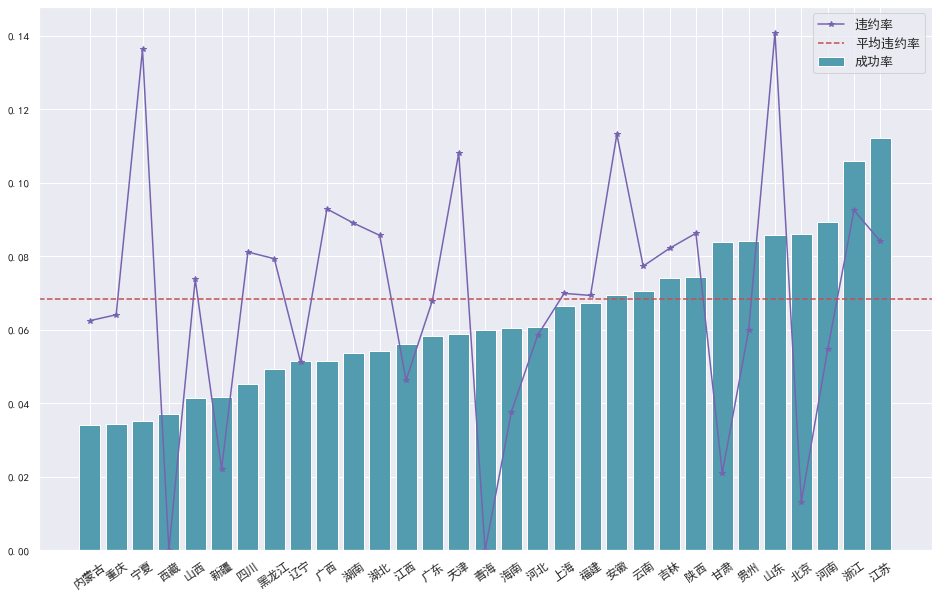

In [32]:
sns.set(font="SimHei")
plt.figure(figsize=(16,10))
plt.bar(data2.index, data2['成功率'], color='#539CAF', label='成功率')
plt.plot(data2.index, data2['违约率'], color='#7663B0', label='违约率', marker='*')
plt.axhline(y=mean, color='r', linestyle='--', label='平均违约率')
plt.legend(loc='best',fontsize=13)
plt.xticks(rotation=35,fontsize=12)
plt.show()

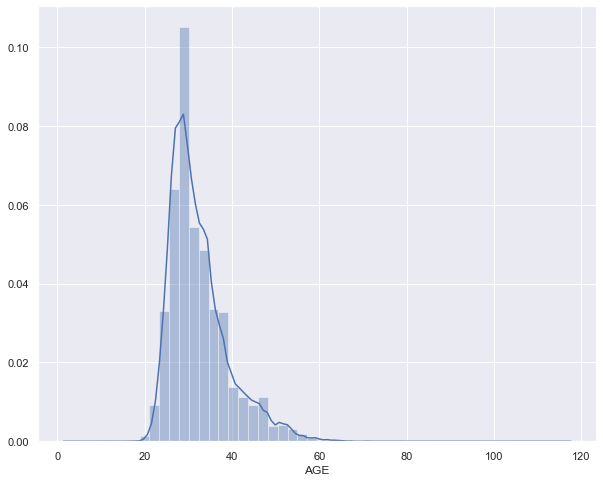

In [30]:
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(data.AGE)